# Os efeitos da pandemia e mudança de governos sobre o preço de combustível 

Neste notebook, iremos analizar como a pandemia e a mudança de governo impactaram no preço do combustível.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import clear_output as cls
import time
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ações PETR3

In [2]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")

In [23]:
petr3_df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var(%)
0,01.March.2024,37.36,41.38,41.86,35.50,13.95M,-9.36
1,01.February.2024,41.22,42.60,44.50,40.74,216.23M,-2.23
2,01.January.2024,42.16,39.00,42.93,38.59,204.82M,8.16
3,01.December.2023,38.98,37.60,39.33,35.06,178.38M,3.40
4,01.November.2023,37.70,36.68,38.51,35.22,239.96M,-0.37
...,...,...,...,...,...,...,...
79,01.August.2017,5.78,5.68,6.06,5.53,180.60M,1.23
80,01.July.2017,5.71,5.48,5.77,5.16,123.75M,4.55
81,01.June.2017,5.46,5.72,5.86,5.24,179.96M,-3.08
82,01.May.2017,5.64,5.96,6.77,5.34,251.19M,-5.15


- Analisando as medidas de centralidade e dispersão das variáveis disponíveis

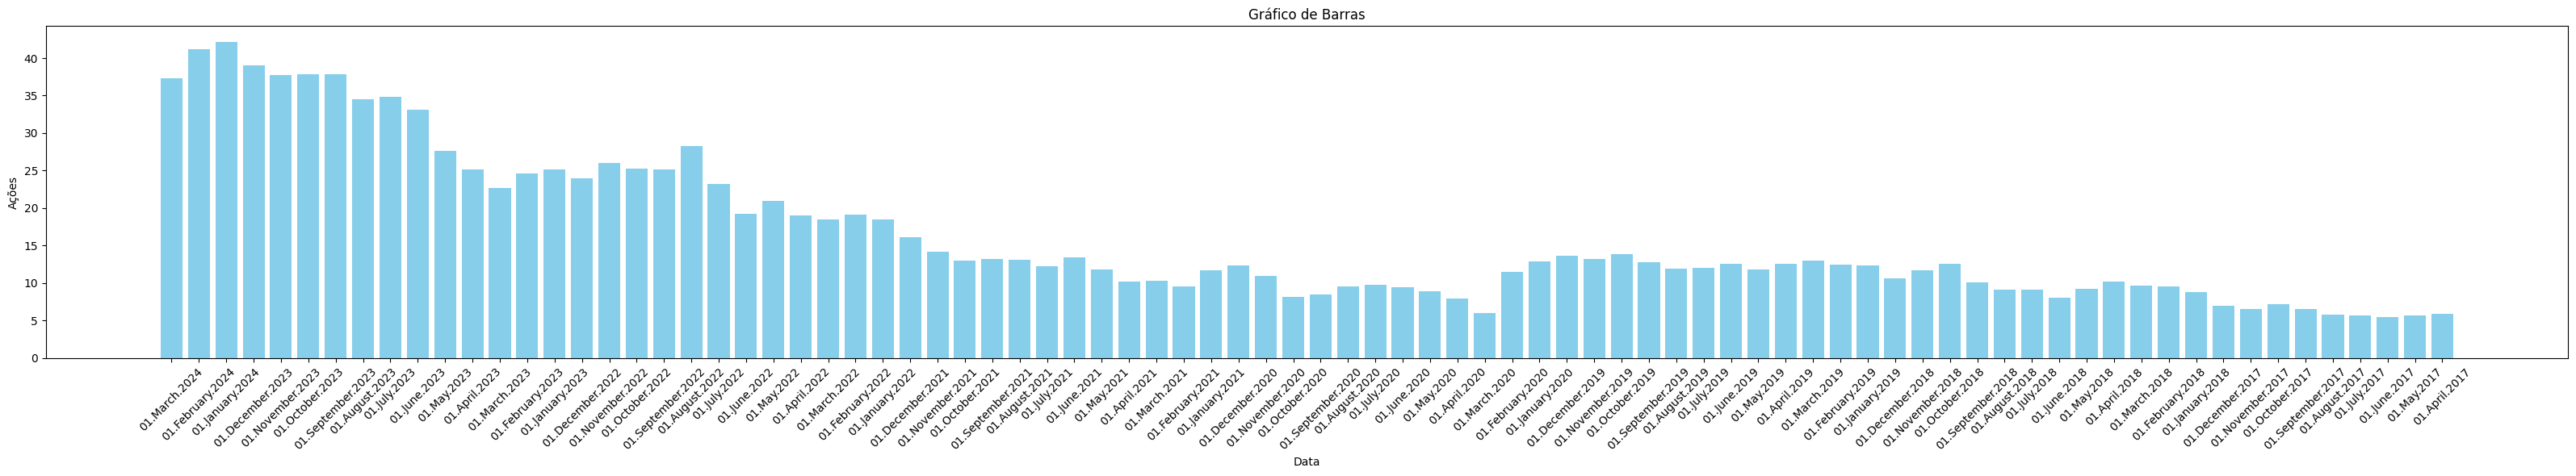

In [9]:
plt.figure(figsize=(32, 6))
plt.bar(petr3_df.index, petr3_df['Último'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Ações')
plt.title('Gráfico de Barras')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(ticks=petr3_df.index, labels=petr3_df['Data'], rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [107]:
print("Dados de máxima: ")
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Dados de máxima: 
Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [108]:
print("Dados de mínima: ")
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Dados de mínima: 
Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


Aqui, observamos a relação entre os valores máximos e mínimos das ações

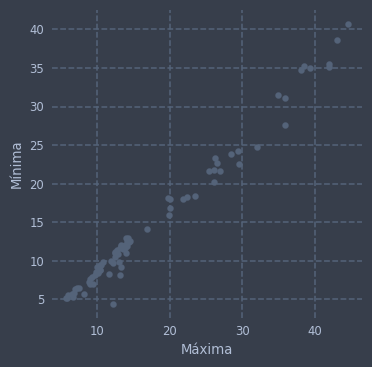

In [109]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

Relação entre o volume e os mínimos das ações

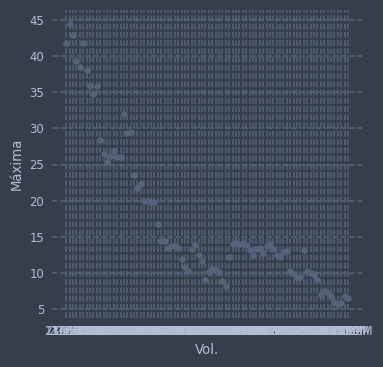

In [110]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

Relação entre os valores máximos e variancia das ações

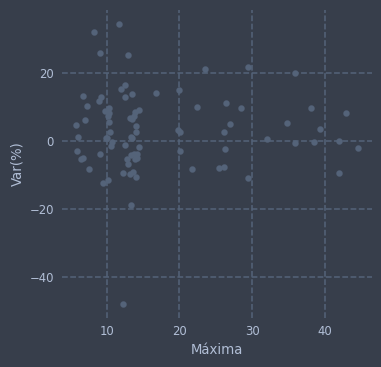

In [111]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [112]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [113]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


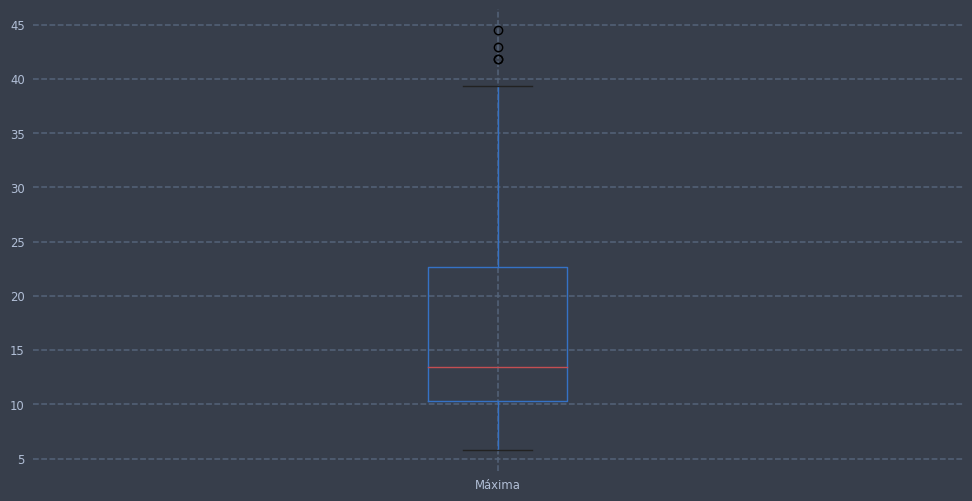

In [114]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

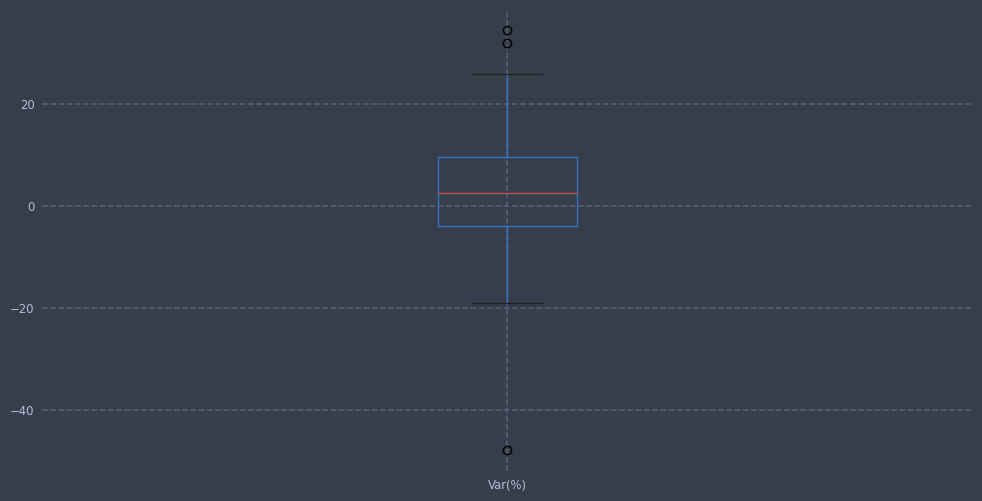

In [115]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

# IDH


In [116]:
#Lendo os dados da base
dataIdh = pd.read_csv("arquivos/IDH/idh.csv")

#Printando informações dos dados (Variancia, média, quartis, etc...)
print(f"var      {dataIdh['idh'].var():.6f}")
print(dataIdh["idh"].describe())

var      0.000023
count    5.000000
mean     0.760200
std      0.004817
min      0.754000
25%      0.758000
50%      0.759000
75%      0.764000
max      0.766000
Name: idh, dtype: float64


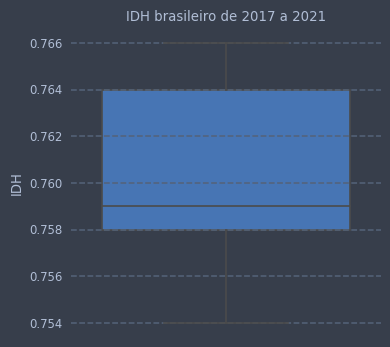

In [117]:
#Boxplot dos dados de referentes a IDH de 2017 a 2021
idhBox = sb.boxplot(dataIdh, y='idh').set_title("IDH brasileiro de 2017 a 2021")

plt.ylabel("IDH")

plt.show(idhBox)

Podemos ver abaixo, como o IDH do Brasil se alterou com o tempo que a pandemia passou

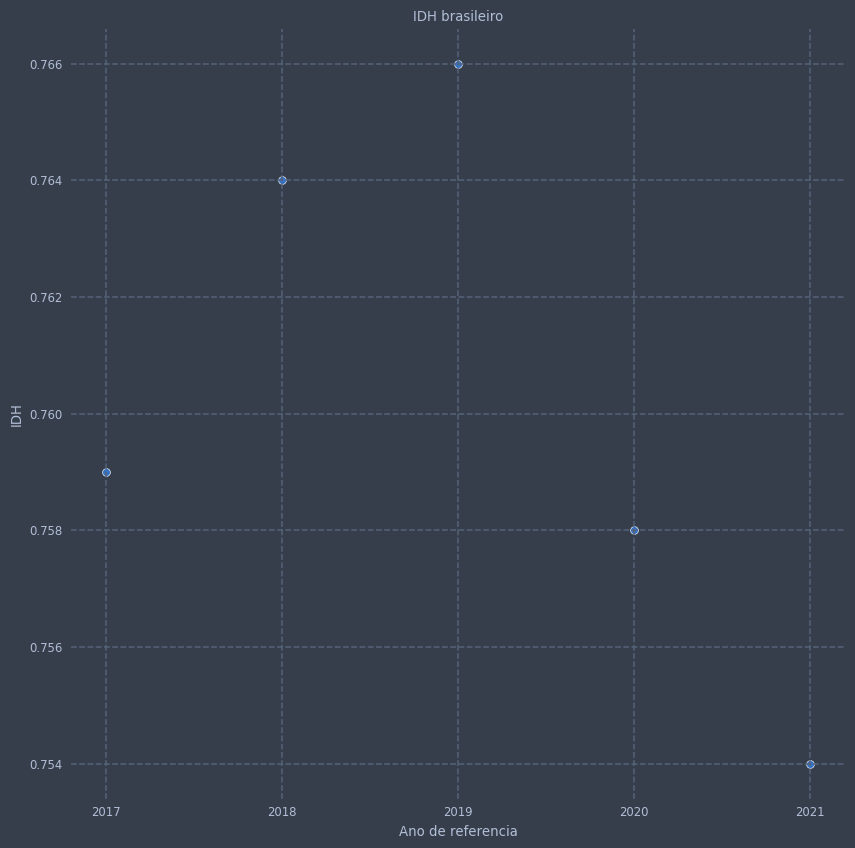

In [118]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(10,10))

#Criando gráfico de disperção com base nos anos e valores de idh
dispersaoIdh = sb.scatterplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo valores do eixo x como múltiplos de 1 (Sem valores quebrados)
dispersaoIdh.xaxis.set_major_locator(ticker.MultipleLocator(1))

#Definindo títulos do gráfico
dispersaoIdh.set_title("IDH brasileiro")
dispersaoIdh.set_ylabel("IDH")
dispersaoIdh.set_xlabel("Ano de referencia")

#Exibindo o gráfico
plt.show()

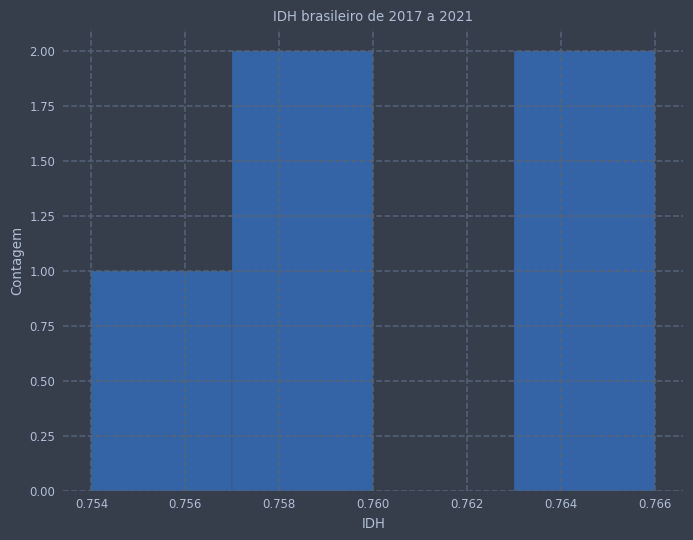

In [119]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Histograma dados dados de IDH entre 2017 e 2021
histIdh = sb.histplot(dataIdh, x='idh').set_title("IDH brasileiro de 2017 a 2021")

#Mudando o título dos eixos
plt.xlabel("IDH")
plt.ylabel("Contagem")

#Plotando os gráficos
plt.show()

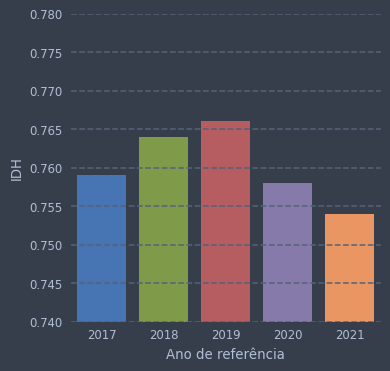

In [120]:
#Criando gráfico de barras com os dados de IDH ao longo dos anos
idhBar = sb.barplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo intervalo de valores do eixo y mostrado no gráfico
eixo = plt.gca()
eixo.set_ylim([0.74, 0.78])

#Alterando títulos dos eixos
plt.xlabel("Ano de referência")
plt.ylabel("IDH")

#Exibindo o gráfico
plt.show()

Abaixo, como o IDH de cada estado se comportou ao longo dos anos de pandemia

In [121]:
#Lendo os dados da base
dataIdhReg = pd.read_csv("arquivos/IDH/GDL-Subnational-HDI-data.csv")

#Separando os dados referentes ao Brasil
dataIdhReg = dataIdhReg.loc[dataIdhReg['Country'] == 'Brazil']

#Separando os dados de acordo com o intervalo de tempo que será analisado
dataIdhReg = dataIdhReg[['Region', '2017', '2018', '2019', '2020', '2021']]

#Removendo linha irrelevante
dataIdhReg = dataIdhReg.drop(209)

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
for cln in dataIdhReg:
    if cln == 'Region': continue
    print(f'Var       {dataIdhReg[cln].var():.6f}')
    print(dataIdhReg[cln].describe())
    print()

Var       0.000725
count    27.000000
mean      0.749000
std       0.026932
min       0.703000
25%       0.732500
50%       0.748000
75%       0.764000
max       0.821000
Name: 2017, dtype: float64

Var       0.000730
count    27.000000
mean      0.753963
std       0.027016
min       0.708000
25%       0.737500
50%       0.753000
75%       0.769000
max       0.826000
Name: 2018, dtype: float64

Var       0.000748
count    27.000000
mean      0.756074
std       0.027357
min       0.709000
25%       0.739500
50%       0.755000
75%       0.771000
max       0.829000
Name: 2019, dtype: float64

Var       0.000731
count    27.000000
mean      0.747889
std       0.027040
min       0.702000
25%       0.731500
50%       0.746000
75%       0.763000
max       0.820000
Name: 2020, dtype: float64

Var       0.000724
count    27.000000
mean      0.744074
std       0.026899
min       0.698000
25%       0.727500
50%       0.743000
75%       0.759000
max       0.816000
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IDH dos estados ao longo dos anos')

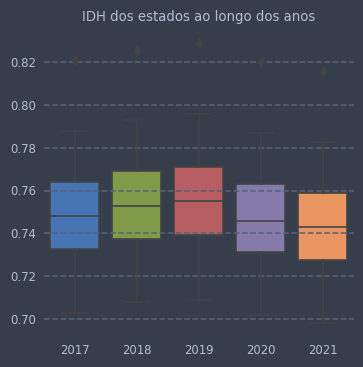

In [122]:
#Boxplot dos dados de IDH ao longo dos anos
sb.boxplot(data=dataIdhReg).set_title('IDH dos estados ao longo dos anos')

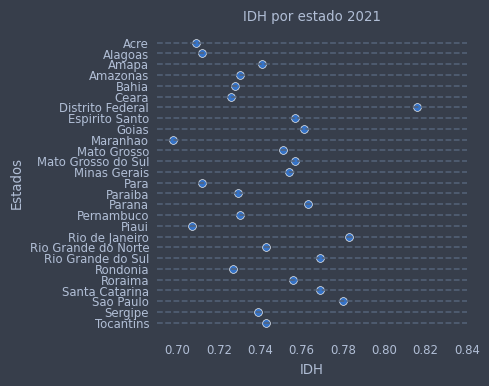

In [152]:
#Plotando gráficos de disperção dos dados de IDH dos estados brasileiros a cada ano entre 2017 e 2021
for cln in dataIdhReg:
    
    #Clear
    cls(wait=True)
    
    #If para ignorar coluna com os estados
    if cln == "Region": continue 

    #Criando gráfico de disperção para todos os estados a cada ano
    dispersaoIdh = sb.scatterplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')
    
    eixo = plt.gca()
    eixo.set_xlim([0.69, 0.84])

    #Plotando os gráficos com linhas no eixo 
    plt.grid(axis='x')
    plt.show()

    time.sleep(1)
    

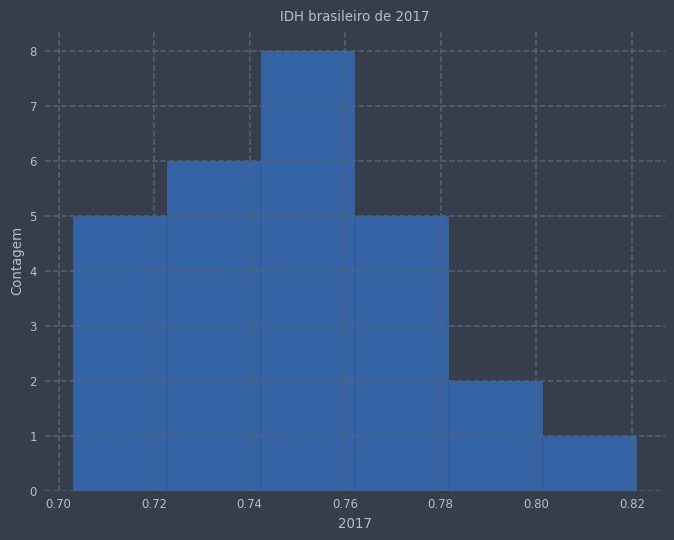

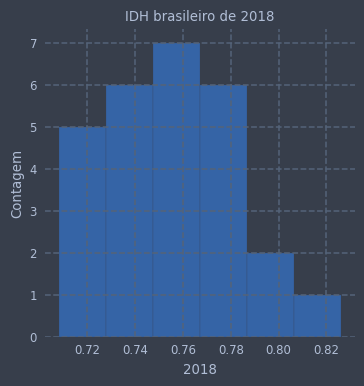

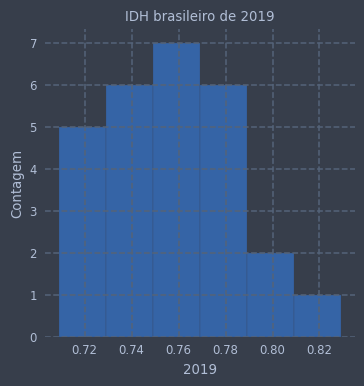

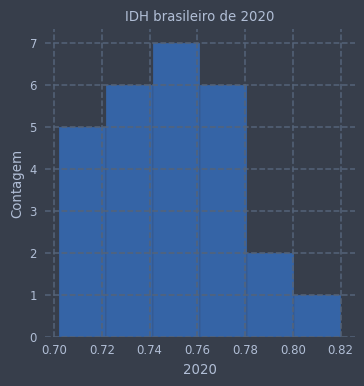

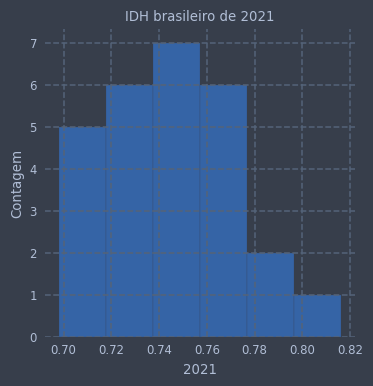

In [124]:
#Definindo o tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Plotando histogramas dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    histIdh = sb.histplot(dataIdhReg, x=cln).set_title(f"IDH brasileiro de {cln}")
    
    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando gráfico
    plt.show()

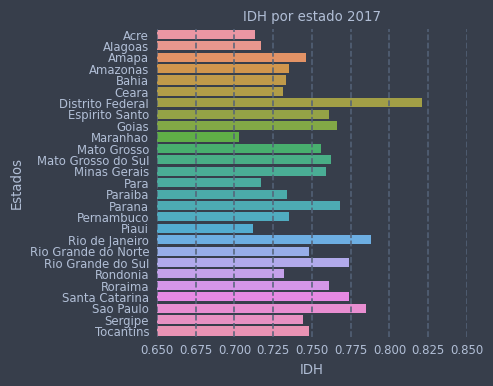

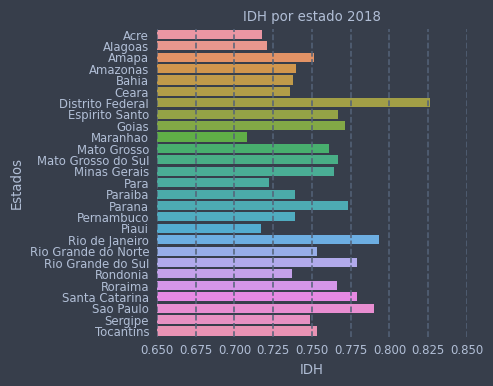

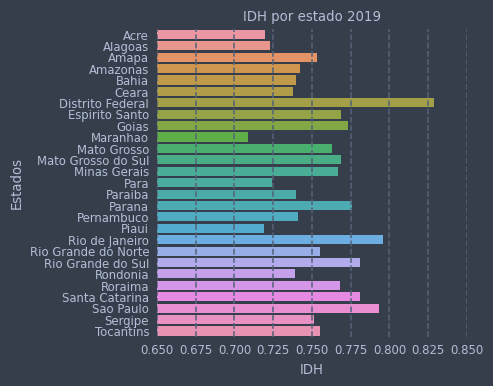

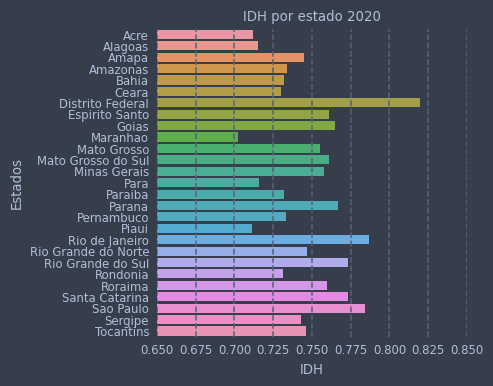

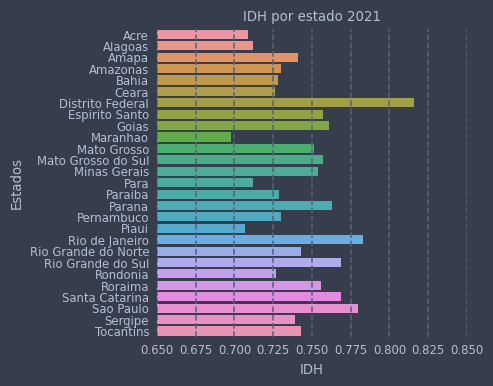

In [125]:
#Plotando gráficos de barra dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.barplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')

    #Definindo intervalo de valores do eixo x a ser exibido no gráfico
    eixo = plt.gca()
    eixo.set_xlim([0.65, 0.85])

    #Exibindo gráfico
    plt.show()

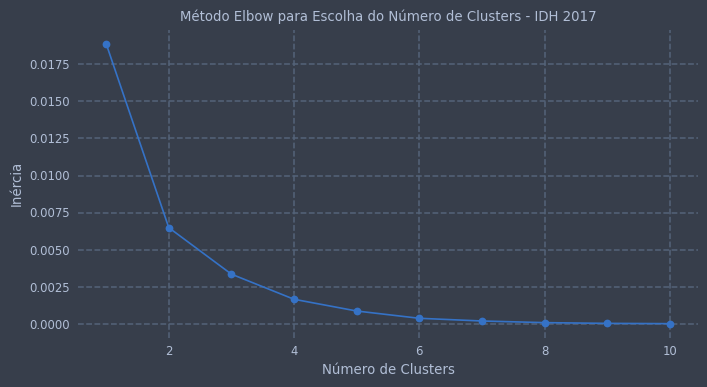

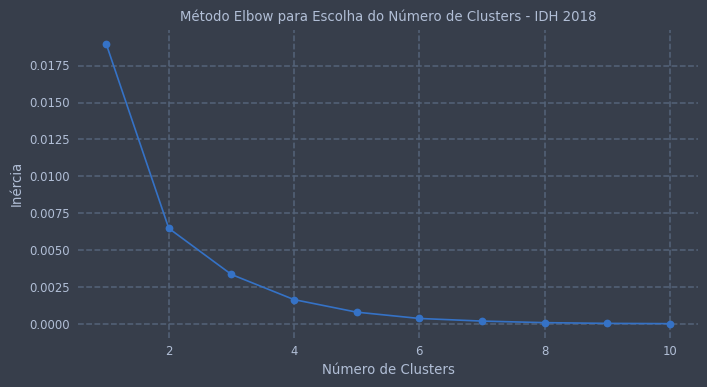

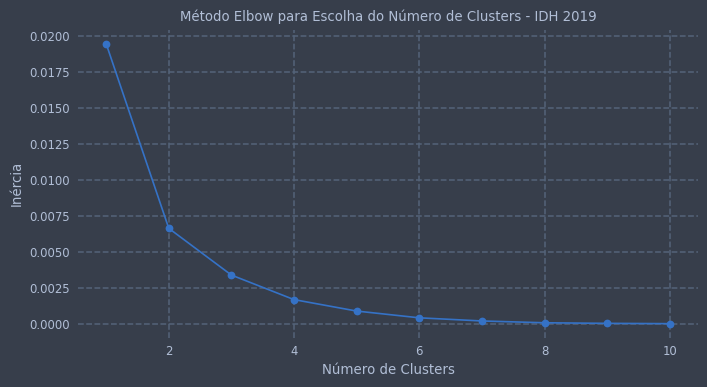

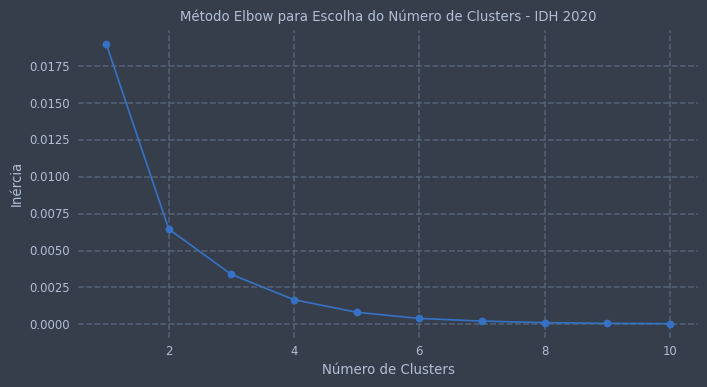

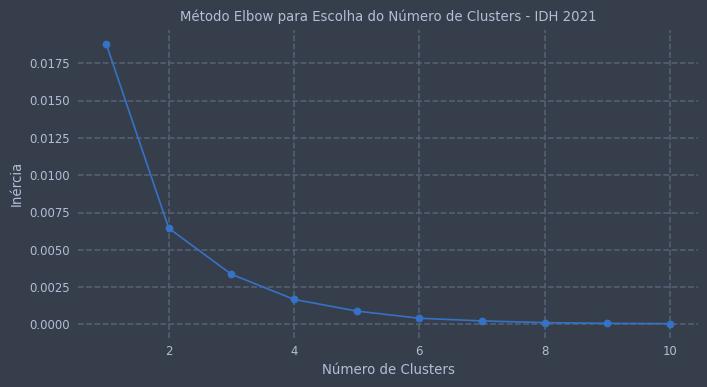

In [126]:
# Escolha do número de clusters usando o método Elbow

#Separando colunas que serão usadas
idhCluster = dataIdhReg[["2017", "2018", "2019", "2020", "2021"]]

for cln in idhCluster:
    #Definindo array para dados do algoritmo Kmeans
    inertia = []
    
    for i in range(1, 11):
        #Definindo parâmetros para o algoritmo Kmeans
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)

        #Rodando o algoritmo
        kmeans.fit(idhCluster[[cln]])

        #Salvando dados de eficiência do algoritmo com i centróides
        inertia.append(kmeans.inertia_)

    # Plotagem do gráfico Elbow
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title(f'Método Elbow para Escolha do Número de Clusters - IDH {cln}')
    plt.grid(True) #Padrão de fundo quadriculado no gráfico
    plt.show()


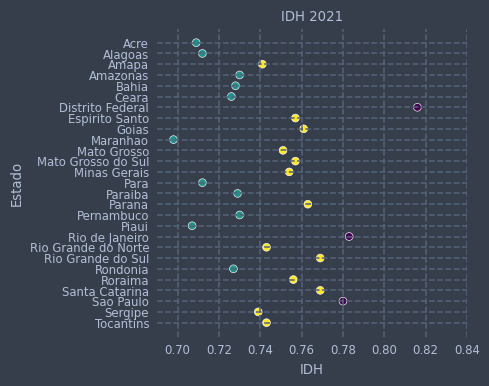

In [154]:
#Número de clusters definido pelo método Elbow
nCluster = 3

#Definindo parâmetros do kmeans
kmeans = KMeans(n_clusters = nCluster, random_state=0, n_init=10)

for cln in idhCluster:
    cls(wait=True)
    #rodando algoritmo K-means para cada ano
    kmeans.fit(idhCluster[[cln]])

    #Criando gráfico de disperção com parâmetro "c" com os resultados do kmeans
    dispersaoIdhCluster = sb.scatterplot(data = dataIdhReg, x = cln, y = 'Region', c = kmeans.labels_)
    dispersaoIdhCluster.set_title(f'IDH {cln}')
    dispersaoIdhCluster.set_xlabel("IDH")
    dispersaoIdhCluster.set_ylabel('Estado')

    eixo = plt.gca()
    eixo.set_xlim([0.69, 0.84])

    #Plotando gráficos
    plt.show()
    time.sleep(1)

# Preço Combustível
### O dataframe do combustível reunia dados do preço médio revenda, desvio padrão e diversos outros parâmetros que foram reduzidos a apenas o preço médio de revenda e data, para assim ter uma analise mais apurada, os dados foram agrupados para média do preço de revenda.

In [11]:
precomb_2017_2024 = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2017_2024.csv")

In [12]:
precomb_2017_2024

,MÊS,PREÇO MÉDIO REVENDA
0,2017-01-04,3.770485
1,2017-01-05,3.751664
2,2017-01-06,3.696870
3,2017-01-07,3.689708
4,2017-01-08,3.911672
...,...,...
78,2023-01-11,5.784060
79,2023-01-12,5.730224
80,2024-01-01,5.706699
81,2024-01-02,5.864322


In [4]:
dfcombinadosfinal = pd.read_csv("arquivos/Preco_Combustivel/resultado.csv")

In [5]:
dfcombinadosfinal = dfcombinadosfinal.drop("Unnamed: 0", axis=1)

In [6]:
dfcombinadosfinal

,MÊS,Último,PREÇO MÉDIO REVENDA
0,2017-01-04,5.64,3.770485
1,2017-01-05,5.46,3.751664
2,2017-01-06,5.71,3.696870
3,2017-01-07,5.78,3.689708
4,2017-01-08,6.54,3.911672
...,...,...,...
78,2023-01-11,37.70,5.784060
79,2023-01-12,38.98,5.730224
80,2024-01-01,42.16,5.706699
81,2024-01-02,41.22,5.864322


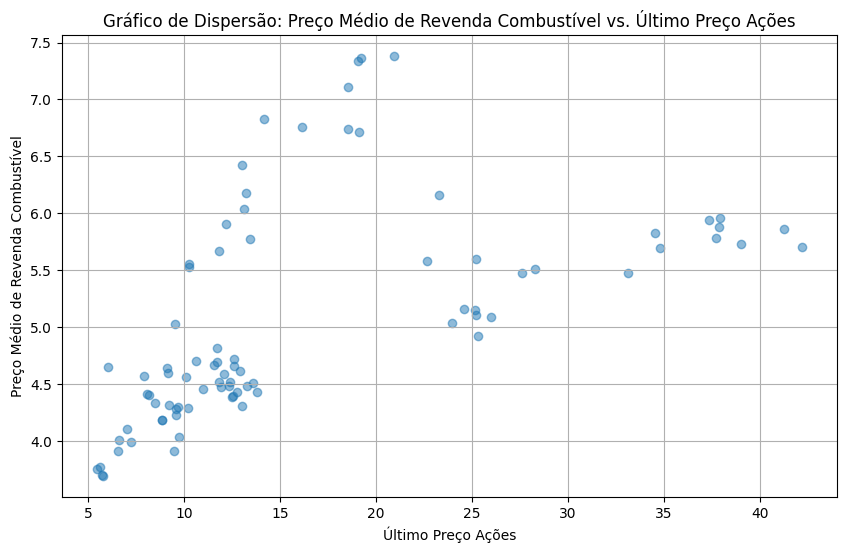

In [49]:
preco_medio_revenda = dfcombinadosfinal['PREÇO MÉDIO REVENDA']
ultimo = dfcombinadosfinal['Último']

plt.figure(figsize=(10, 6))
plt.scatter(ultimo, preco_medio_revenda, alpha=0.5)

plt.title('Gráfico de Dispersão: Preço Médio de Revenda Combustível vs. Último Preço Ações')
plt.xlabel('Último Preço Ações')
plt.ylabel('Preço Médio de Revenda Combustível')

plt.grid(True)
plt.show()

# Preço Combustível e Ações
### Períodos importantes para analise de dados, Governo Temer, Governo Bolsonaro, Pandemia, Fim Governo Bolsonaro, Governo Lula.

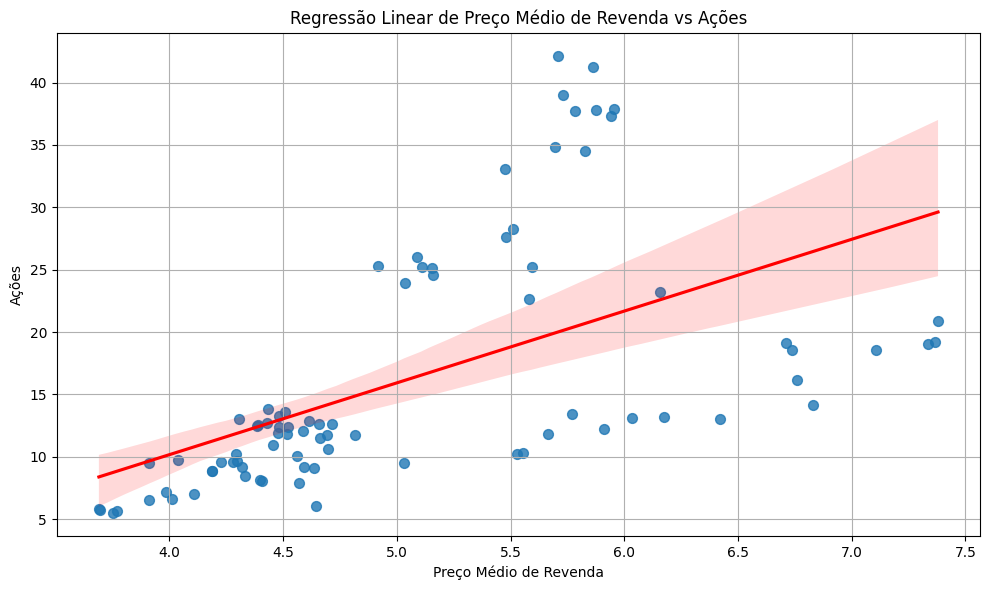

In [7]:
plt.figure(figsize=(10, 6))
sb.regplot(x='PREÇO MÉDIO REVENDA', y='Último', data=dfcombinadosfinal, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regressão Linear de Preço Médio de Revenda vs Ações')
plt.xlabel('Preço Médio de Revenda')
plt.ylabel('Ações')
plt.grid(True)
plt.tight_layout()
plt.show()

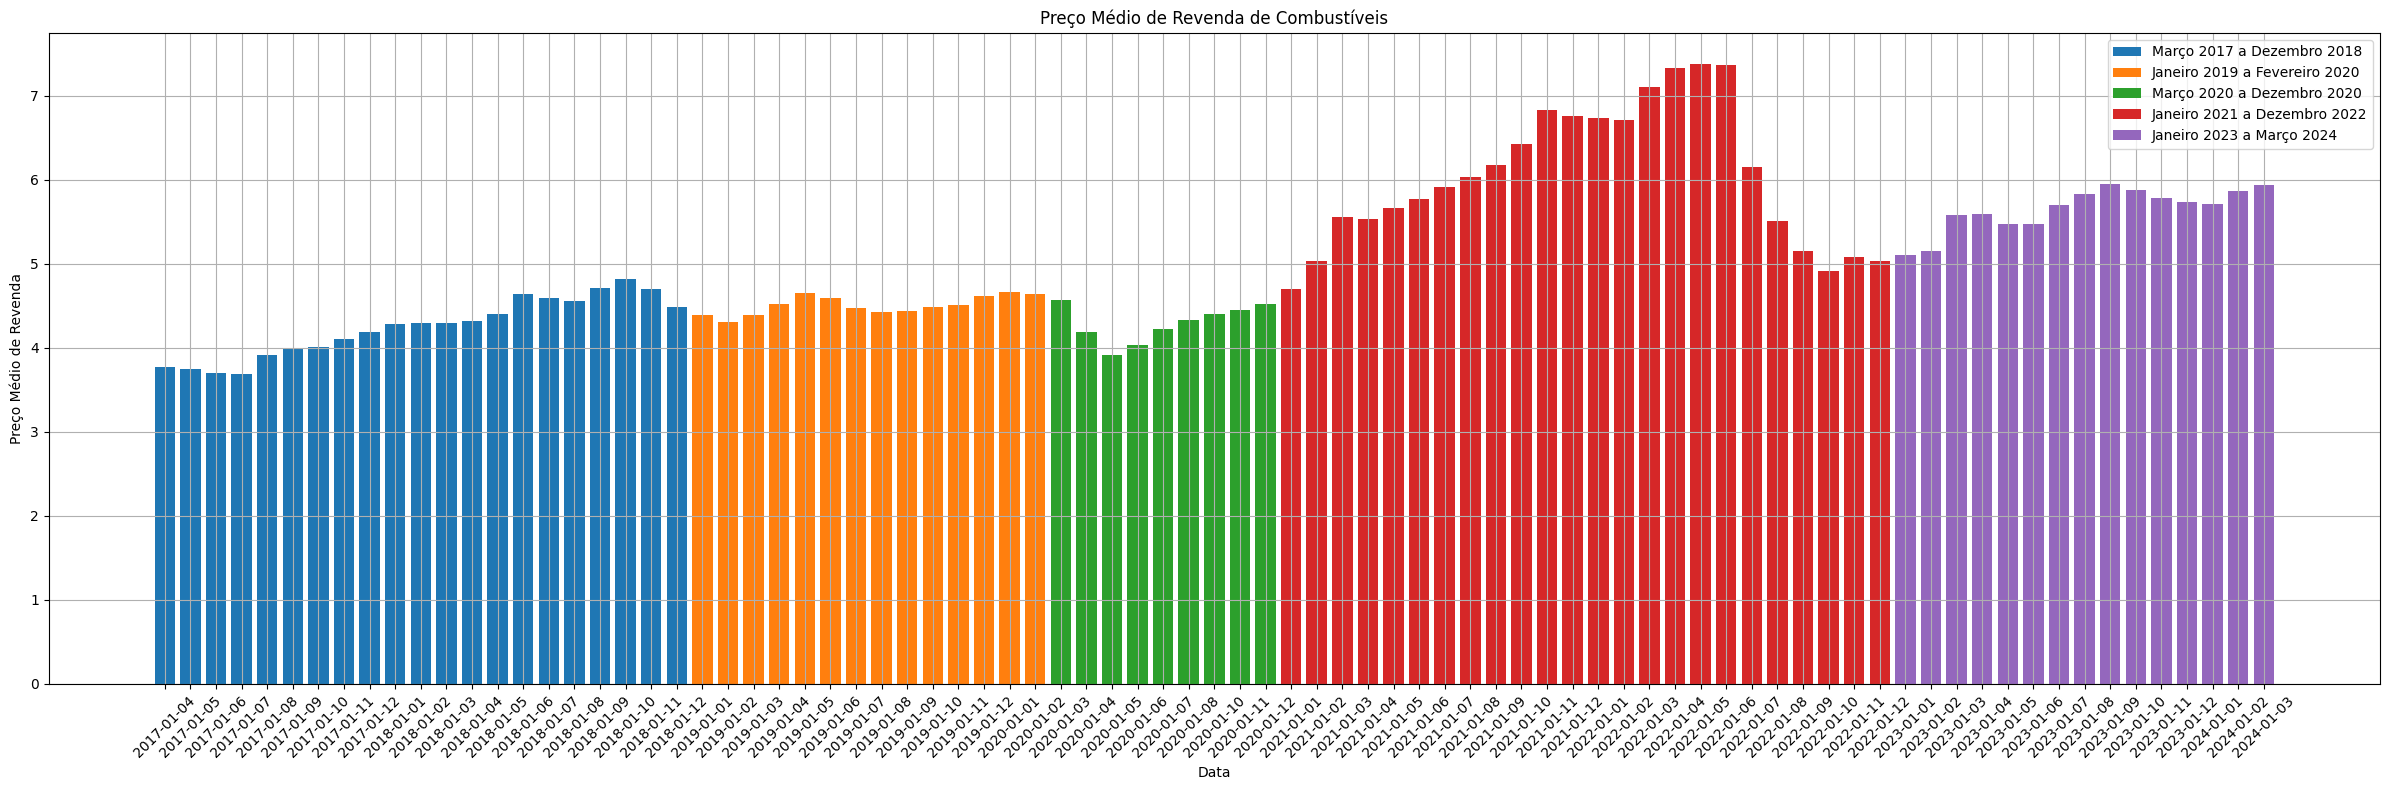

In [76]:
periodos = [
    ('Março 2017 a Dezembro 2018', ('2017-01-03', '2018-01-12')),
    ('Janeiro 2019 a Fevereiro 2020', ('2019-01-01', '2020-01-02')),
    ('Março 2020 a Dezembro 2020', ('2020-01-03', '2020-01-12')),
    ('Janeiro 2021 a Dezembro 2022', ('2021-01-01', '2022-01-12')),
    ('Janeiro 2023 a Março 2024', ('2023-01-01', '2024-01-03'))
]

# Preparar o gráfico
plt.figure(figsize=(24, 8))

# Iterar sobre os períodos
for nome_periodo, (inicio, fim) in periodos:
    periodo_df = dfcombinadosfinal[(dfcombinadosfinal['MÊS'] >= inicio) & (dfcombinadosfinal['MÊS'] <= fim)]
    plt.bar(periodo_df['MÊS'], periodo_df['PREÇO MÉDIO REVENDA'], label=nome_periodo)

# Configurações do gráfico
plt.title('Preço Médio de Revenda de Combustíveis')
plt.xlabel('Data')
plt.ylabel('Preço Médio de Revenda')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

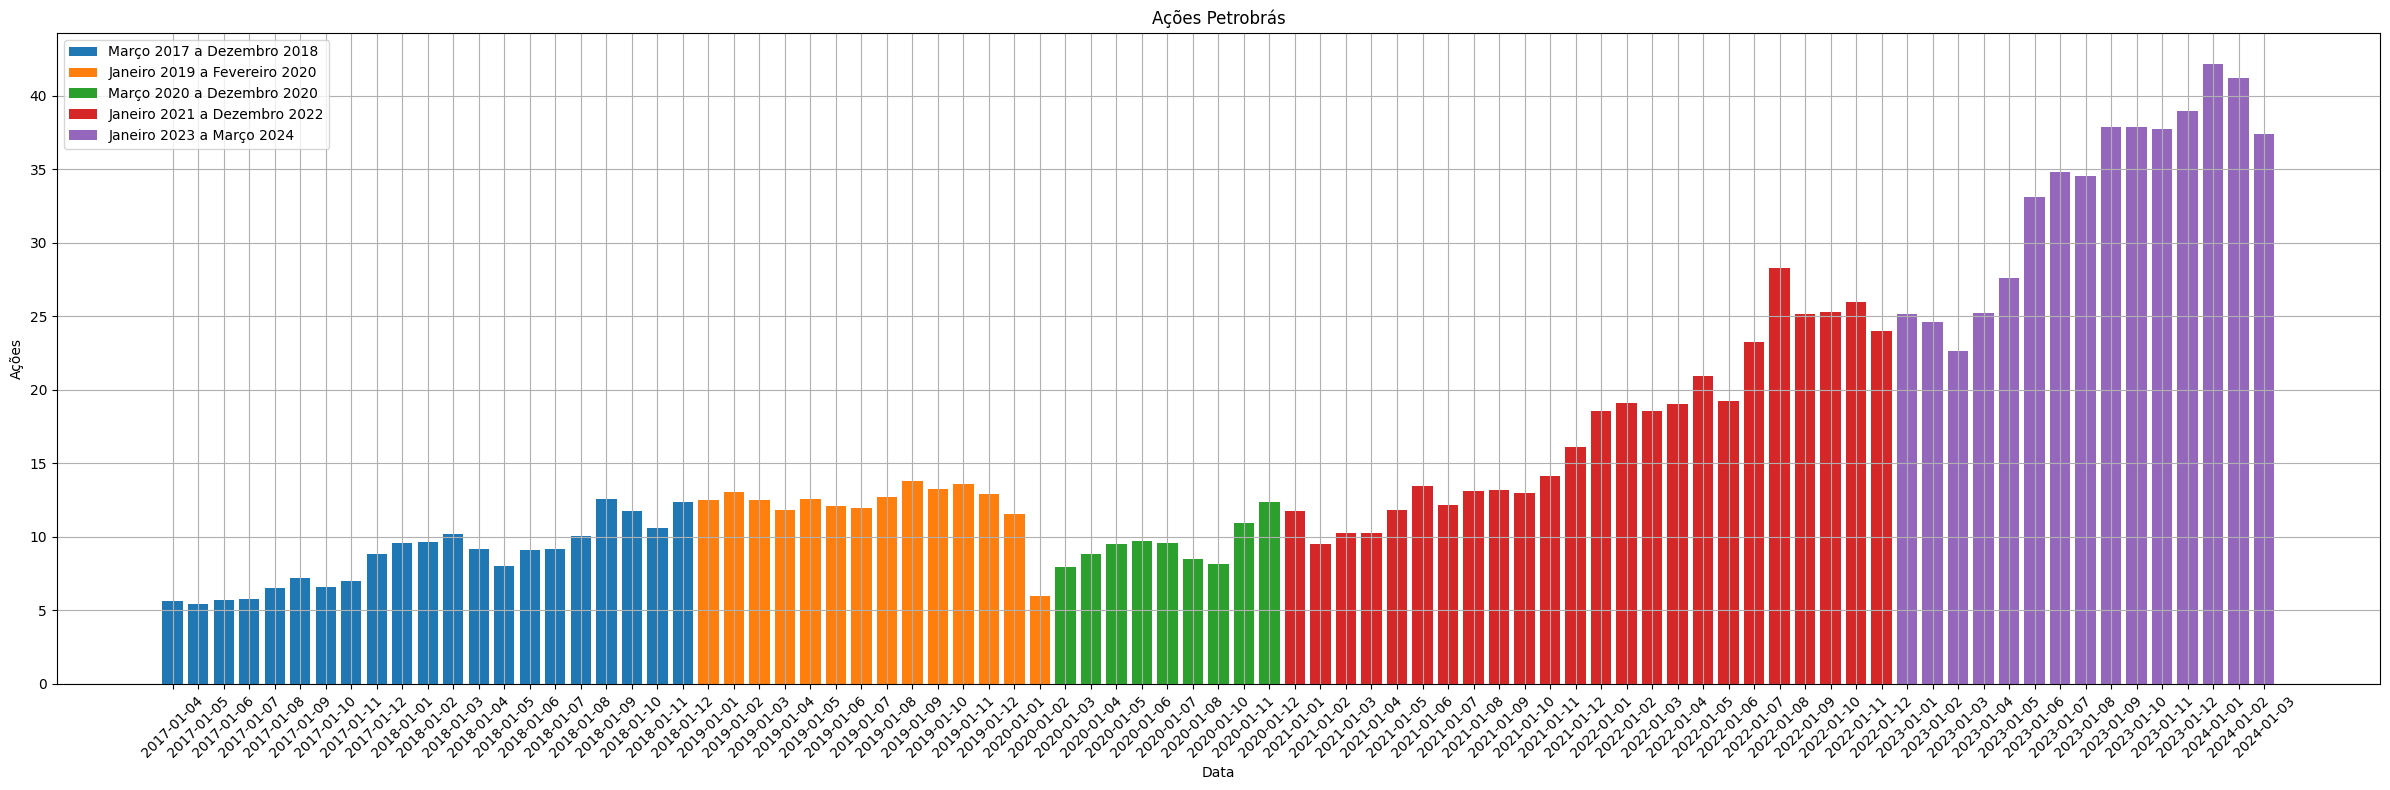

In [77]:
periodos = [
    ('Março 2017 a Dezembro 2018', ('2017-01-03', '2018-01-12')),
    ('Janeiro 2019 a Fevereiro 2020', ('2019-01-01', '2020-01-02')),
    ('Março 2020 a Dezembro 2020', ('2020-01-03', '2020-01-12')),
    ('Janeiro 2021 a Dezembro 2022', ('2021-01-01', '2022-01-12')),
    ('Janeiro 2023 a Março 2024', ('2023-01-01', '2024-01-03'))
]

# Preparar o gráfico
plt.figure(figsize=(24, 8))

# Iterar sobre os períodos
for nome_periodo, (inicio, fim) in periodos:
    periodo_df = dfcombinadosfinal[(dfcombinadosfinal['MÊS'] >= inicio) & (dfcombinadosfinal['MÊS'] <= fim)]
    plt.bar(periodo_df['MÊS'], periodo_df['Último'], label=nome_periodo)

# Configurações do gráfico
plt.title('Ações Petrobrás')
plt.xlabel('Data')
plt.ylabel('Ações')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

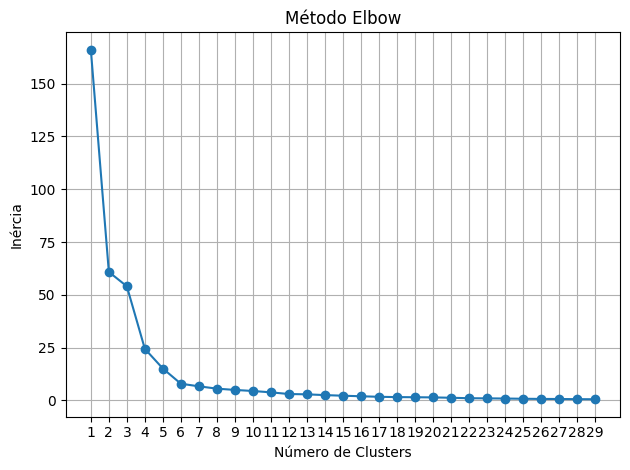

In [60]:
# Selecionando as colunas do preço gasolina e valor acoes
X = dfcombinadosfinal[['PREÇO MÉDIO REVENDA', 'Último']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar os valores de inércia
inertia = []

# Calcular a inércia para diferentes valores de k
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico de inércia e número de clusters
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 30))
plt.grid(True)
plt.tight_layout()
plt.show()

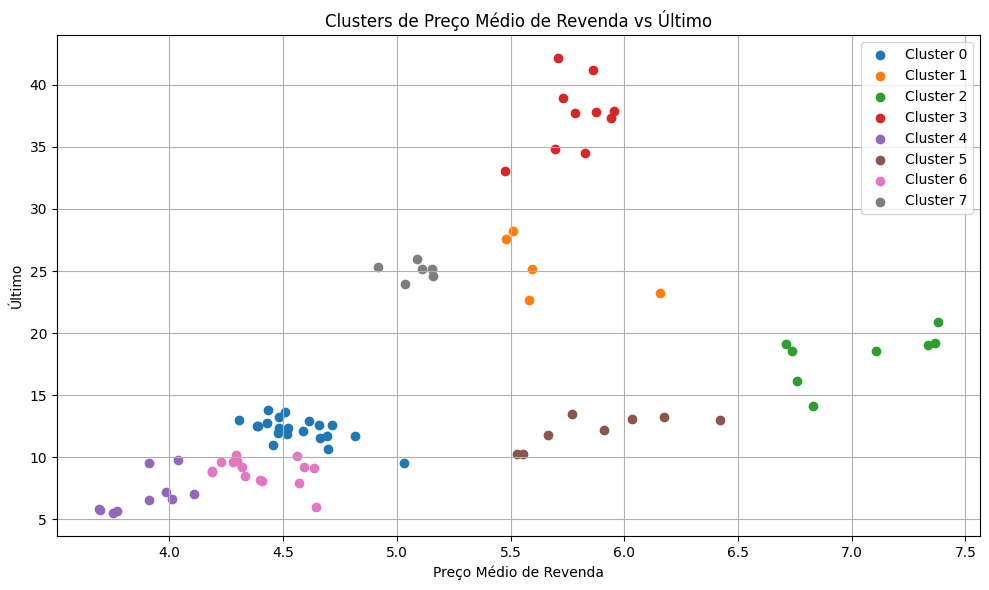

In [78]:
X = dfcombinadosfinal[['PREÇO MÉDIO REVENDA', 'Último']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_clusters = 8

# Instanciar e ajustar o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar as etiquetas de cluster ao DataFrame original
dfcombinadosfinal['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = dfcombinadosfinal[dfcombinadosfinal['Cluster'] == cluster]
    plt.scatter(cluster_data['PREÇO MÉDIO REVENDA'], cluster_data['Último'], label=f'Cluster {cluster}')
plt.title('Clusters de Preço Médio de Revenda vs Último')
plt.xlabel('Preço Médio de Revenda')
plt.ylabel('Último')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# IPCA

In [ ]:
#Criando dataframe pra receber dados do ipca de cada mes dos anos de 2017 a 2021
dataIpcaMedio = pd.DataFrame(columns=["Mes", "2017", "2018", "2019", "2020", "2021"])

#criando tupla com todos os meses do ano
meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro",
        "Novembro", "Dezembro")

#atribuindo os meses do ano à coluna "Mes"
for mes in meses:
    dataIpcaMedio = dataIpcaMedio._append({"Mes": mes}, ignore_index=True)

#For's para percorrer os arquivos com os dados
for j in range(17, 22): #For para os dados dos anos 2017 a 2021

    for i in range(1, 13): #For para os dados do mes de Janeiro a Dezembro

        if i < 10: #if para evitar erro no caminho até o arquivo
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}0{i}Subitem.csv")
        else:
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}{i}Subitem.csv")
        
        #Atribuição dos dados ao dataframe
        dataIpcaMedio.loc[i-1, f"20{j}"] = dataIpca["NACIONAL"].loc[0]

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
for cln in dataIpcaMedio:
    if cln == 'Mes': continue
    print(f'Var       {dataIpcaMedio[cln].var():.6f}')
    print(dataIpcaMedio[cln].describe())
    print()

Var       0.031493
count     12.00
unique    12.00
top        0.38
freq       1.00
Name: 2017, dtype: float64

Var       0.133857
count     12.00
unique    12.00
top        0.29
freq       1.00
Name: 2018, dtype: float64

Var       0.122093
count     12.00
unique    12.00
top        0.32
freq       1.00
Name: 2019, dtype: float64

Var       0.247982
count     12.00
unique    12.00
top        0.21
freq       1.00
Name: 2020, dtype: float64

Var       0.093348
count     12.00
unique    12.00
top        0.25
freq       1.00
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IPCA ao longo dos anos')

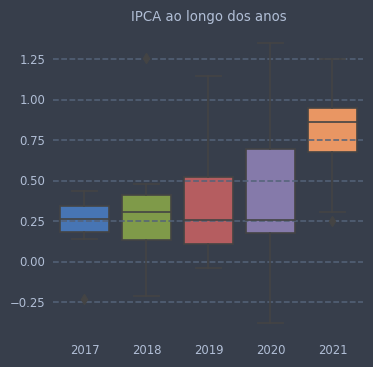

In [ ]:
#Boxplot dos dados de IPCA ao longo dos anos de 2017 a 2021
sb.boxplot(data=dataIpcaMedio).set_title('IPCA ao longo dos anos')

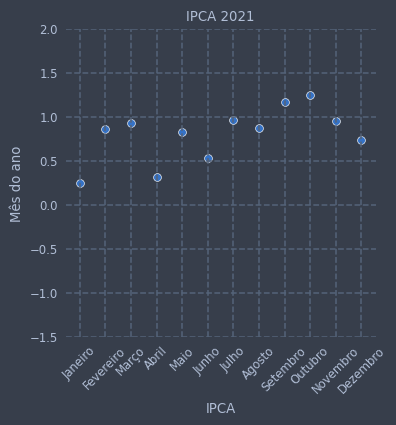

In [162]:
#Gráficos de disperção dos dados de IPCA por mes de cada ano entre 2017 e 2021
for cln in dataIpcaMedio:
    cls(wait=True)
    if cln == "Mes": continue
    dispersaoIpca = sb.scatterplot(data=dataIpcaMedio, x='Mes', y=cln)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("IPCA")
    dispersaoIpca.set_ylabel('Mês do ano')

    eixo = plt.gca()
    eixo.set_ylim([-1.5, 2])

    plt.xticks(rotation=45)
    plt.show()
    time.sleep(1)

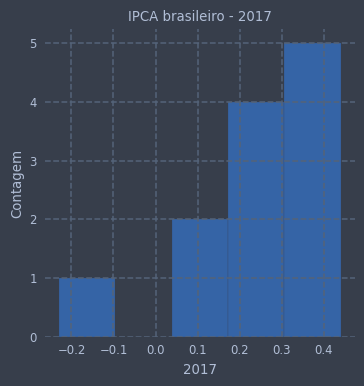

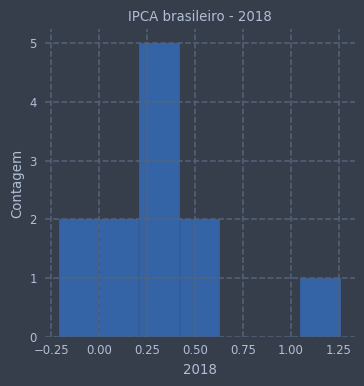

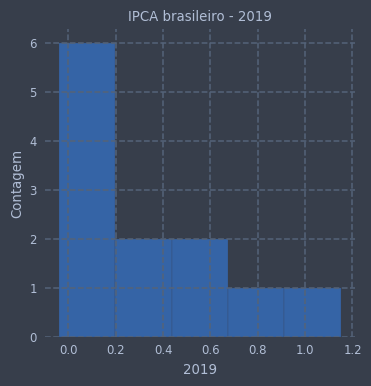

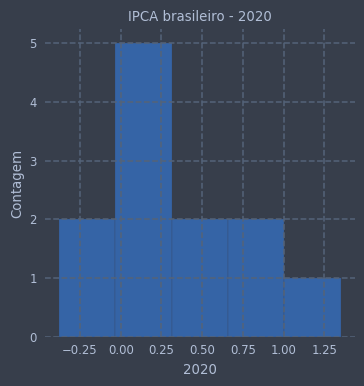

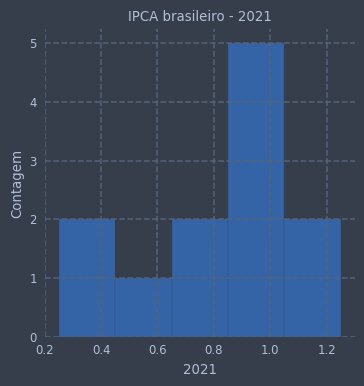

In [ ]:
#Histogramas dos dados de IPCA por ano
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.histplot(dataIpcaMedio, x=cln).set_title(f"IPCA brasileiro - {cln}")

    #Mudando titulo do eixo y
    plt.ylabel("Contagem")

    #Plotando o gráfico
    plt.show()

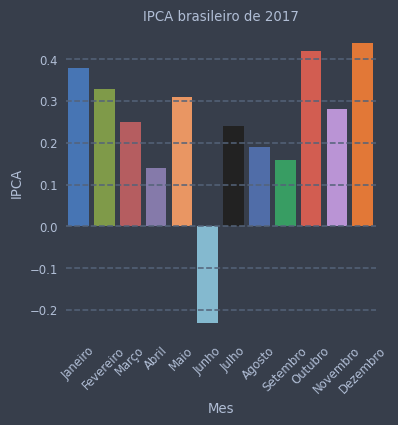

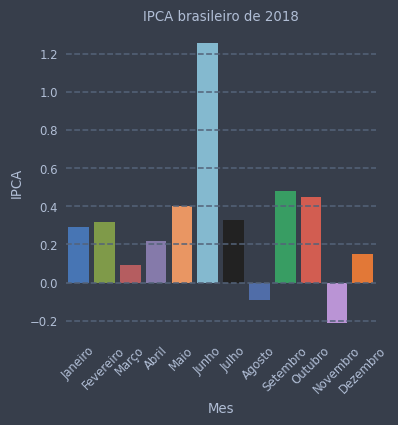

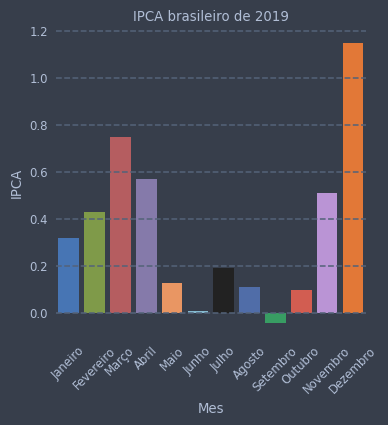

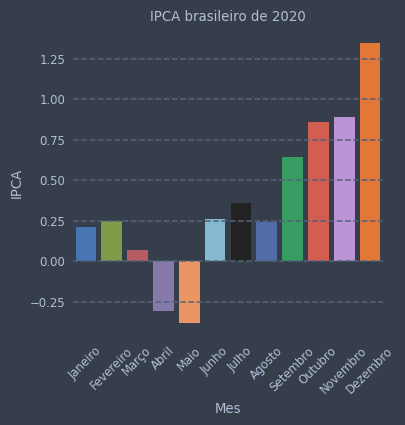

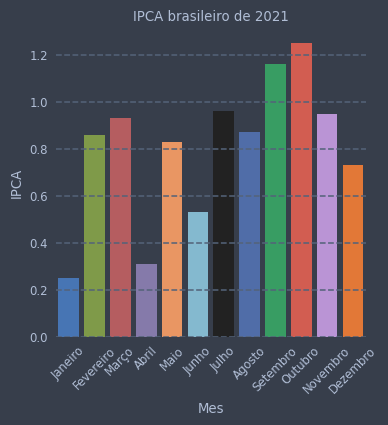

In [ ]:
#Gráficos de barra dos dados de IPCA por mês ao longo dos anos entre 2017 e 2021
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.barplot(dataIpcaMedio, x='Mes', y=cln).set_title(f"IPCA brasileiro de {cln}")

    #Mudando nome do eixo y
    plt.ylabel("IPCA")

    #Rotacionando os títulos do eixo x
    plt.xticks(rotation=45)

    #Exibindo gráficos
    plt.show()

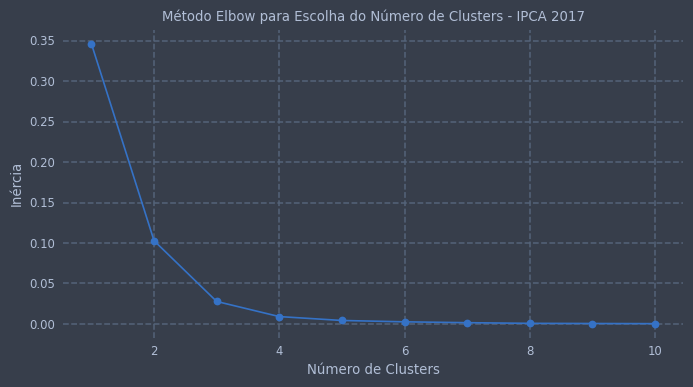

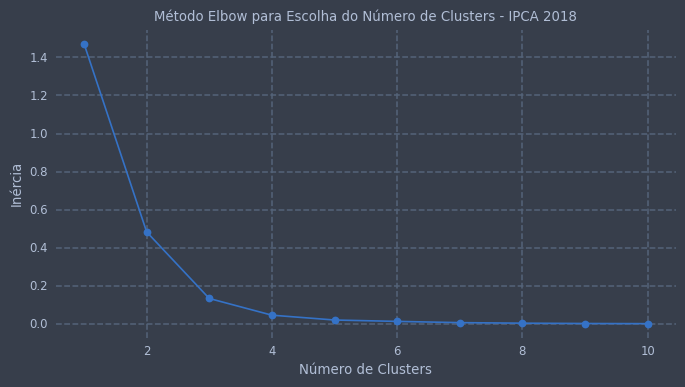

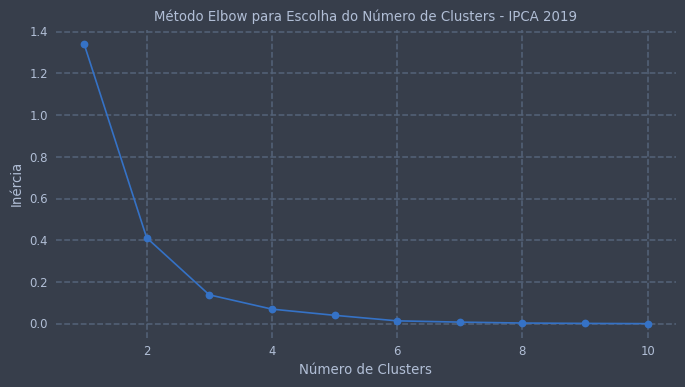

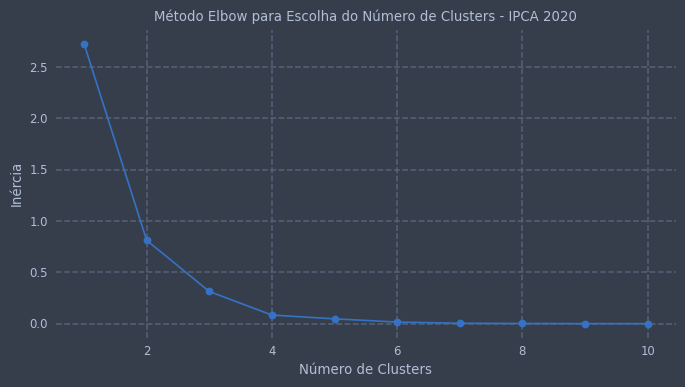

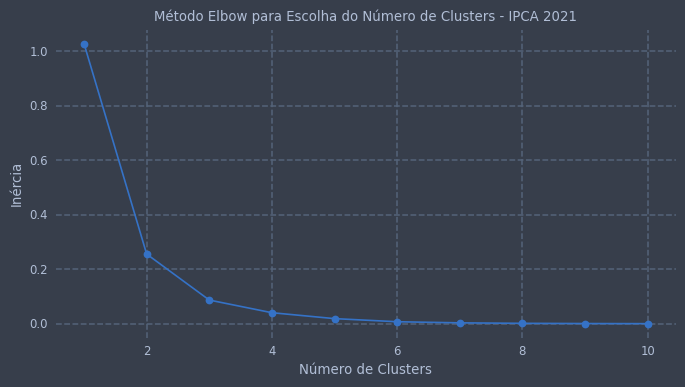

In [ ]:
# Escolha do número de clusters usando o método Elbow

#Separando as colunas do dataset que serão usadas
ipcaCluster = dataIpcaMedio[["2017", "2018", "2019", "2020", "2021"]]

for cln in ipcaCluster:
    #Criando vetor para armazenar informações do kmeans
    inertia = []

    for i in range(1, 11):
        #Passando os parâmetros para o algoritmo Kmeans
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)

        #Rodando o algoritmo
        kmeans.fit(ipcaCluster[[cln]])

        #Salvando dados de eficiência do algoritmo com i centróides
        inertia.append(kmeans.inertia_)

    # Plotagem do gráfico Elbow
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title(f'Método Elbow para Escolha do Número de Clusters - IPCA {cln}')
    plt.grid(True) #Padrão de fundo quadriculado no gráfico
    plt.show()



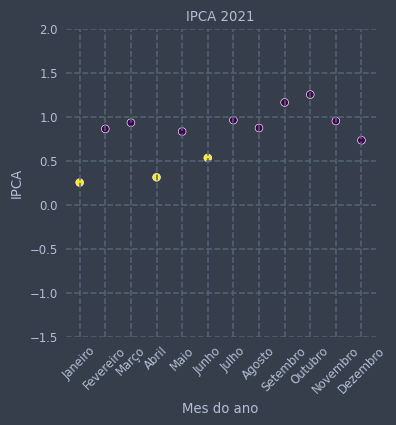

In [163]:
#Número de clusters definido pelo método Elbow
nCluster = 2

#Definindo parâmetros do kmeans
kmeans = KMeans(n_clusters = nCluster, random_state=0, n_init=10)

for cln in ipcaCluster:
    cls(wait=True)
    #rodando algoritmo K-means para cada gráfico
    kmeans.fit(ipcaCluster[[cln]])

    #Criando gráfico de disperção com parâmetro "c" com os resultados do kmeasn
    dispersaoIpca = sb.scatterplot(data = dataIpcaMedio, x = "Mes", y = cln, c = kmeans.labels_)
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("Mes do ano")
    dispersaoIpca.set_ylabel("IPCA")

    eixo = plt.gca()
    eixo.set_ylim([-1.5, 2])

    plt.xticks(rotation=45)
    #Plotando gráficos
    plt.show()
    time.sleep(1)